# Classifying Movie Genres Based on the Title and Plot

Cameron Wonchoba

Andrew Leo

Tou Yang

# Overview

Movies are put into categories called `genres`. These genres describe the expectations that a person should have when they watch the movie.

We are given a data set that maps each movie title and their plot to the genre they are in. Using Natural Language Processing, we will identify what genre the movie is based on the title and plot. 

Developing a tool that can accurately identify these genres based on the genre and plot may help movie creators effectively write a movie title and generic plot. Once they create their title and plot, they could pass it into this model and verify that it conveys the message that they intend.

This is a multiclass classification problem that will utilize Natural Language Processing.

## What is Natural Language Processing?

Natural Language processing allows computers to analyze and understand human written language. Ultimately, we want to be able to parse the natural language in a way that is valuable. 

There are two parts of a language that the computer needs to be able to understand:

### Syntax
Syntax describes the way we arrange words to make a sentence that is grammatically correct. Syntax is important to help the computer learn the structure of our language. It helps to learn if each sentence is grammatically correct or not. 

### Semantics
Semantics describes the meaning behind each word, sentence or phrase. Semantics are important to help the computer understand the meaning behind indiviudal words and combination of words. This becomes difficult when words have more than one meaning. For example:

1. I crashed my car.
2. I crashed on my couch.

Here, the word "crashed" have different meanings. 

In the first example, "crashed" means destroyed or ruined.

In the second example, "crashed" means sleep.

Helping a computer understand these subtle differences in meaning can be difficult to do.

## Techniques/Libraries to Used in NLP
Below is a list of libraries and tools that may help us in the project.

1. Natural Language Toolkit (NLTK)
    * https://www.nltk.org/
    * Slow and steep learning curve 
2. TextBlob
    * https://textblob.readthedocs.io/en/dev/
    * Easy to learn (great for beginners!), but it is slow
3. CoreNLP
    * https://stanfordnlp.github.io/CoreNLP/
    * Really fast and can be integrated with NLTK
4. Gensim
    * https://github.com/RaRe-Technologies/gensim
    * Specializes in semantic recognition
5. spaCy
    * https://spacy.io/
    * Really fast! Only supports 7 languages (Python is one of them, so we're good).
6. polyglot
    * https://polyglot.readthedocs.io/en/latest/index.html
    * Similar performance to spaCy but supports more languages.
7. scikit–learn
    * https://scikit-learn.org/stable/
    * Great documentation and familiar. Does not use Neural Networks for processing, so it isn't as good.
8. Pattern
    * https://www.clips.uantwerpen.be/pages/pattern
    * Good for webmining, but doesn't include enough NLP tasks


Sources:

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://sunscrapers.com/blog/8-best-python-natural-language-processing-nlp-libraries/

# Topic Modeling
Here we are going to do a form of topic modeling. Topic Modeling is trying to understand the topic of a piece of text. In our case, the topic can be defined as the genre. We will try to figure out the genre of the movie (topic).

# Data

The data set that we are using can be found here: https://github.com/davidsbatista/text-classification/blob/master/movies_genres.csv.bz2

This data set includes the title, plot and genre of 117,352 movies. The genres that are included in this data set are:
* Action
* Adult 
* Adventure
* Animation
* Biography
* Comedy
* Crime
* Documentary
* Drama
* Family
* Fantasy
* Game-Show
* History
* Horror
* Lifestyle
* Music
* Musical
* Mystery
* News
* Reality-TV
* Romance
* Sci-Fi
* Short
* Sport
* Talk-Show
* Thriller
* War
* Western

> NOTE: Each movie is mapped to only one genre. In practice, it may be the case that movies are mapped to more than one genre.

In [98]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [99]:
path_to_data = "../data/movies_genres.csv"
movies = pd.read_csv(path_to_data, delimiter='\t')

In [100]:
movies.head(3)

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [101]:
import nltk
nltk.download('all') # This takes awhile

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\c

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]  

[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\chosb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data

True

In [102]:
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns.")

There are 117352 rows and 30 columns.


In [103]:
print(f"The movie genres are:\n",'\n'.join(movies.columns[2:].tolist()))

The movie genres are:
 Action
Adult
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Game-Show
History
Horror
Lifestyle
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western


In [104]:
movie_counts

[('Action', 12381),
 ('Adult', 61),
 ('Adventure', 10245),
 ('Animation', 11375),
 ('Biography', 1385),
 ('Comedy', 33875),
 ('Crime', 15133),
 ('Documentary', 12020),
 ('Drama', 46017),
 ('Family', 15442),
 ('Fantasy', 7103),
 ('Game-Show', 2048),
 ('History', 2662),
 ('Horror', 2571),
 ('Lifestyle', 0),
 ('Music', 2841),
 ('Musical', 596),
 ('Mystery', 12030),
 ('News', 3946),
 ('Reality-TV', 12338),
 ('Romance', 19242),
 ('Sci-Fi', 8658),
 ('Short', 578),
 ('Sport', 1947),
 ('Talk-Show', 5254),
 ('Thriller', 8856),
 ('War', 1407),
 ('Western', 2761)]

In [105]:
print("Count of each movie:\n")
movie_counts = []
for col in movies.columns[2:]:
    movie_counts += [(col, movies[col].sum())]
movie_counts_df = pd.DataFrame(movie_counts, columns = ["Genre", "Count"])

movie_counts_df = movie_counts_df.sort_values('Count', ascending=False)
movie_counts_df

Count of each movie:



,Genre,Count
8,Drama,46017
5,Comedy,33875
20,Romance,19242
9,Family,15442
6,Crime,15133
0,Action,12381
19,Reality-TV,12338
17,Mystery,12030
7,Documentary,12020
3,Animation,11375


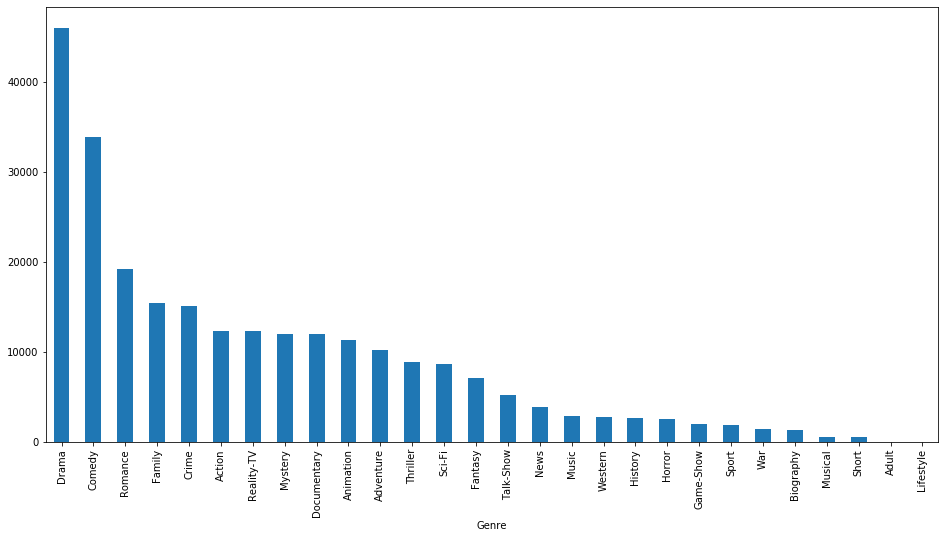

In [106]:
movie_counts_df.plot(x='Genre', y='Count', kind='bar', legend=False, figsize= (16,8))

The most common movie genres are:
* Drama
* Comedy 
* Romance
* Family
* Crime

The least common movie genres are:
* Lifestyle
* Adult
* Short
* Musical
* Biography

There are 0 "lifestyle" movies. We can drop this column.

In [107]:
movies = movies.drop(columns=['Lifestyle'], axis=1)

Are there any weird values in the table?

In [108]:
movies.isnull().any()

title          False
plot           False
Action         False
Adult          False
Adventure      False
Animation      False
Biography      False
Comedy         False
Crime          False
Documentary    False
Drama          False
Family         False
Fantasy        False
Game-Show      False
History        False
Horror         False
Music          False
Musical        False
Mystery        False
News           False
Reality-TV     False
Romance        False
Sci-Fi         False
Short          False
Sport          False
Talk-Show      False
Thriller       False
War            False
Western        False
dtype: bool

All values exist

## Lets look at the actual titles and plots

In [109]:
movies['title']

0                                      "#7DaysLater" (2013)
1              "#BlackLove" (2015) {Crash the Party (#1.9)}
2         "#BlackLove" (2015) {Making Lemonade Out of Le...
3             "#BlackLove" (2015) {Miss Independent (#1.5)}
4            "#BlackLove" (2015) {Sealing the Deal (#1.10)}
                                ...                        
117347                      "Ørnen: En krimi-odyssé" (2004)
117348                           "Øyevitne" (2014) {(#1.1)}
117349                           "Øyevitne" (2014) {(#1.3)}
117350                           "Øyevitne" (2014) {(#1.5)}
117351         "Über Österreich - Juwele des Landes" (2016)
Name: title, Length: 117352, dtype: object

Movie titles are surrounded by quotes. We will extract them using the following regular expression:

`"([^"]*)"`

In english, this regular expression can be read as:

Match everything that starts with quotes, contains anything that isn't a quote, followed by zero or more things, followed by a quote. 

In [110]:
# Lets extract the title name.
movies['Extracted Title'] = movies['title'].str.extract(r'"([^"]*)"')

# Now remove the first occurence of the '#' from the string.
movies['Extracted Title'] = movies['Extracted Title'].str.replace('#',"",1)

The year the title was made is surrounded by paranthesis. We will extract them using the following regular expression:

`\((.*?)\)`

In [111]:
movies['year'] = movies['title'].str.extract(r'\((.*?)\)')

It turns out that we also have tv shows in this data set. These can be discovered if there is some text surround by curly braces ({}). We can extract these by using the folloiwng regular expression:

`\{(.*?)\}`

We will then get rid of the episode number (these are defined by paranthesis).

`\(.*\)`

In [112]:
movies['Episode Info'] = movies['title'].str.extract(r'\{(.*?)\}')
movies['Episode Info'] = movies['Episode Info'].str.replace(r"\(.*\)","")

# Detecting languages
We should look at what languages we have. We should only deal with the english language for now.

We will detect the language of the plot. We choose the plot because it has the most words, and it is supposed to be grammatically correct. We can assume that they are grammatically correct as they are uploaded onto IMbD.

https://pypi.org/project/langdetect/

In [113]:
from langdetect import detect

# Apply the detect function for every row on the "plot" column.
# NOTE: This takes a while to complete.
movies['Language'] = movies.apply(lambda row : detect(row['plot']), axis=1)

In [114]:
movies['Language'].value_counts()

en    117193
nl       120
de        14
it         7
da         6
no         2
pt         2
es         2
sv         2
fr         2
sl         1
hu         1
Name: Language, dtype: int64

There are some non-english movies in this set. Lets drop the rows that aren't english.

In [117]:
# Keep rows that are in english.
movies = movies[movies['Language'] == 'en']
movies['Language'].value_counts()

en    117193
Name: Language, dtype: int64

# Tokenization
Now we need to tokenize all of the words.

In [122]:
from nltk.tokenize import word_tokenize

# For every plot, split it into its respective tokens.
movies["plot_tokens"] =  movies.apply(lambda row : word_tokenize(row['plot']), axis=1)

In [130]:
movies['plot_tokens'][0]

['#',
 '7dayslater',
 'is',
 'an',
 'interactive',
 'comedy',
 'series',
 'featuring',
 'an',
 'ensemble',
 'cast',
 'of',
 'YouTube',
 'celebrities',
 '.',
 'Each',
 'week',
 'the',
 'audience',
 'writes',
 'the',
 'brief',
 'via',
 'social',
 'media',
 'for',
 'an',
 'all-new',
 'episode',
 'featuring',
 'a',
 'well-known',
 'guest-star',
 '.',
 'Seven',
 'days',
 'later',
 'that',
 'week',
 "'s",
 'episode',
 'premieres',
 'on',
 'TV',
 'and',
 'across',
 'multiple',
 'platforms',
 '.']

We now have our tokens for each row.

Lets extract these tokens into a list, and find the 20 most common tokens.

In [132]:
from nltk.probability import FreqDist
fdist = FreqDist()

plot_tokens_lst = movies["plot_tokens"].tolist()

for sentence in plot_tokens_lst:
    for word in sentence:
        fdist[word.lower()]+=1
fdist

FreqDist({'the': 609996, '.': 558246, ',': 544017, 'to': 414316, 'and': 363337, 'a': 332824, 'of': 221373, 'in': 179084, 'is': 177679, "'s": 172203, ...})

In [134]:
fdist.most_common(20)

[('the', 609996),
 ('.', 558246),
 (',', 544017),
 ('to', 414316),
 ('and', 363337),
 ('a', 332824),
 ('of', 221373),
 ('in', 179084),
 ('is', 177679),
 ("'s", 172203),
 ('his', 129437),
 ('with', 124580),
 ('her', 124556),
 ('he', 120040),
 ('that', 106186),
 ('for', 105884),
 ('on', 83875),
 ('she', 80077),
 ('but', 74929),
 ('as', 68470)]

These tokens seem uninformative...

In [136]:
# I'm also curious as to how many total tokens we have
token_count = 0
for sentence in plot_tokens_lst:
    token_count += len(sentence)

print("Total Number of Tokens: ", token_count)

Total Number of Tokens:  13147643


In [139]:
# How many unique tokens are there?
print(f"There are {len(fdist)} unique tokens.")

There are 181407 unique tokens.


# Lemmatization
Stemming works by cutting off the ends of the words. However, this doesn't always work. Sometimes it will convert a word into a word that is not technically it's root. 

Lemmatization will do this for us.

In [147]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

word_lem = WordNetLemmatizer()
word_lem.lemmatize('doing')

'doing'